In [2]:
import sys, os, time, pickle
import numpy as np
from ising_model import *
from random_lattice import *
from seaborn import heatmap
import matplotlib.pyplot as plt
prefix = '/Users/sebwagner/Documents/Grad_School/Physics 212/Final Project/Code/me_data/'
%load_ext autoreload
%autoreload 2

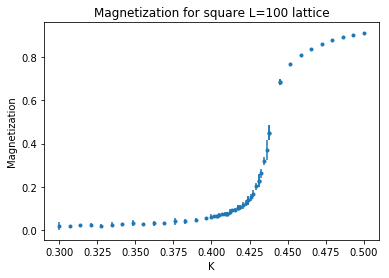

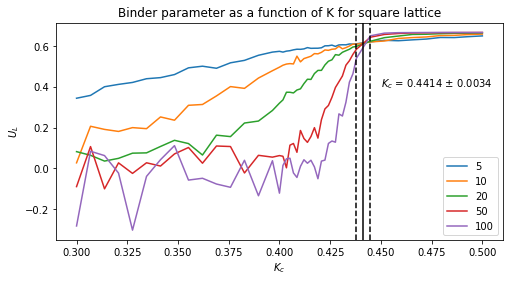

<Figure size 576x288 with 0 Axes>

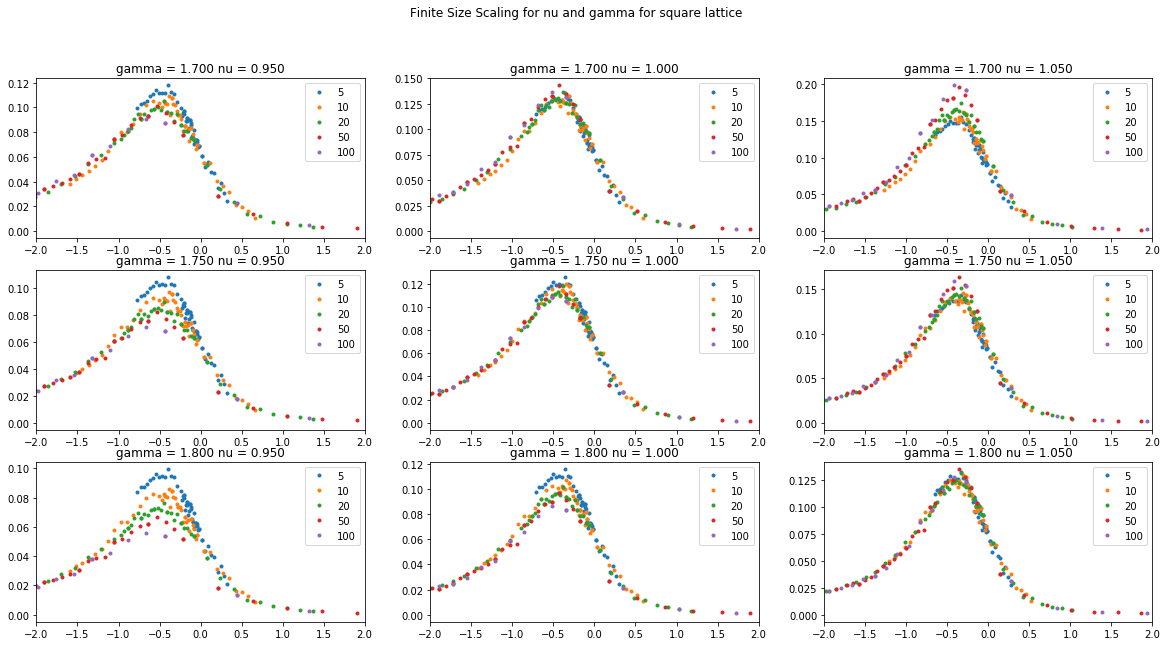

<Figure size 576x288 with 0 Axes>

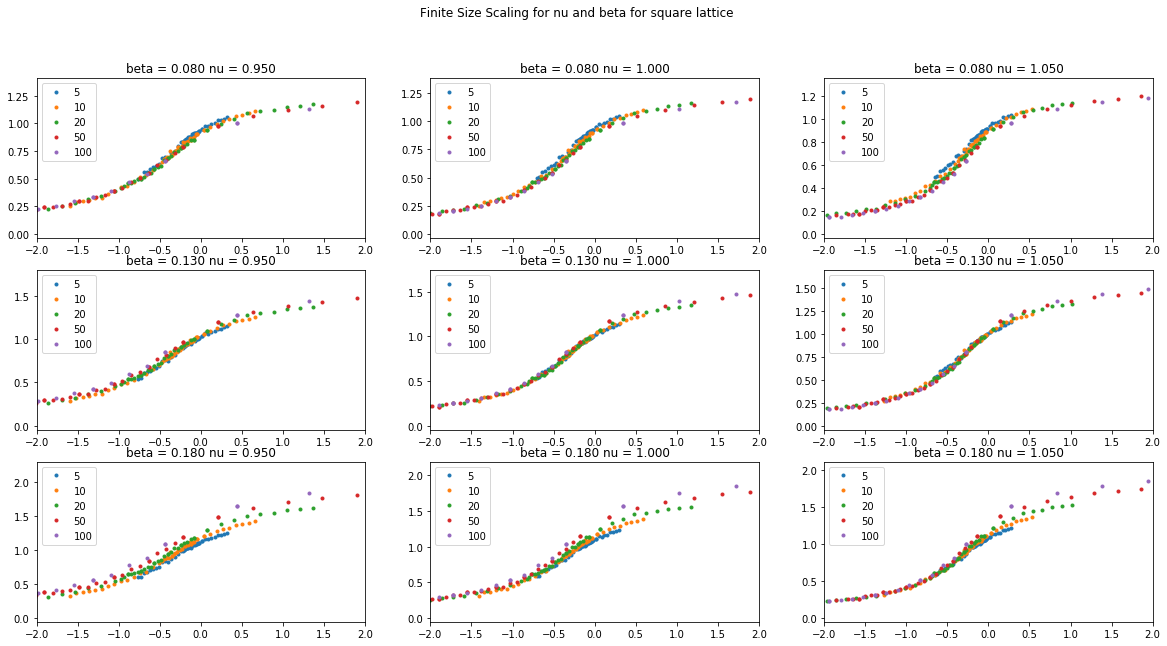

<Figure size 576x288 with 0 Axes>

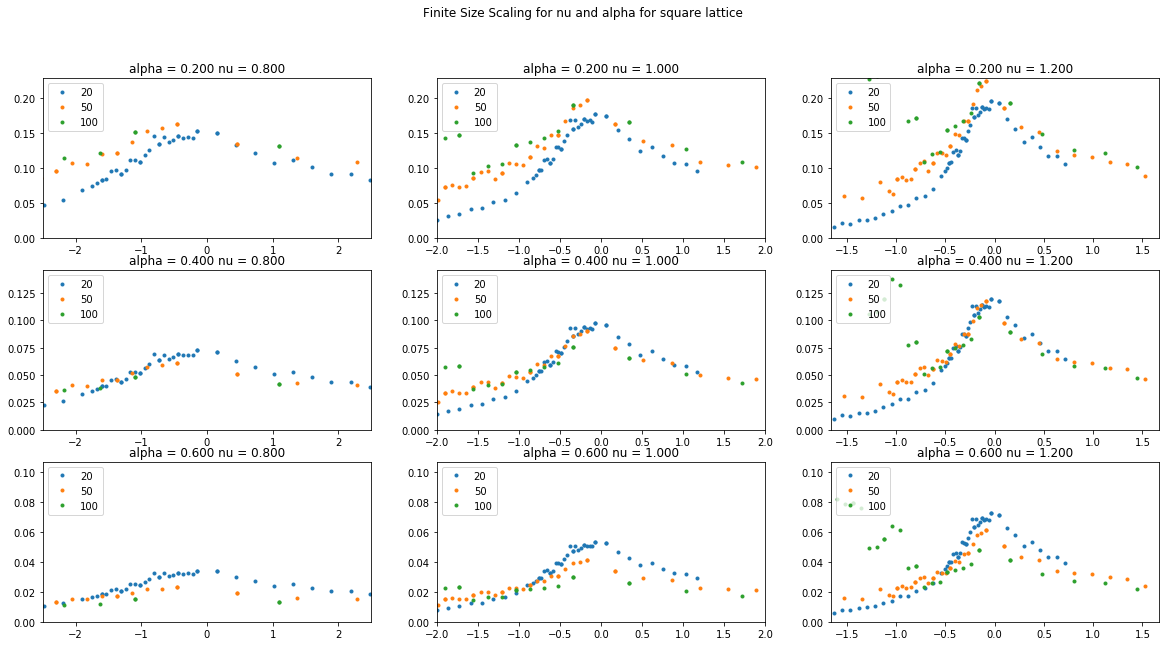

In [47]:
# Square magnetization calculations
lattice = 'square'
N_k = 30
Ks = np.concatenate((np.linspace(0.3,0.5,N_k),np.linspace(0.4,0.45,N_k)))
Ks.sort()
Ls = [5,10,20,50,100]
L = 100
nn = False 
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
K_delete = []
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        try:
            m = np.loadtxt(prefix+'m_full_%d_%f_%s_False'%(L,Ks[K_i],lattice))
        except:
            K_delete.append(K_i)
            continue
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_False'%(L,Ks[K_i],lattice))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
Ks = np.delete(Ks,K_delete)
em = np.delete(em,K_delete,axis=1)
e2 = np.delete(e2,K_delete,axis=1)
mm = np.delete(mm,K_delete,axis=1)
m2 = np.delete(m2,K_delete,axis=1)
m4 = np.delete(m4,K_delete,axis=1)
mstd = np.delete(mstd,K_delete,axis=1)
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.43793103+0.44482759)/2
Kstd = (0.44482759-0.43793103)/2
Kc_i = 20
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.45,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder parameter as a function of K for %s lattice'%(lattice))
plt.show()

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 1.75
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.05,gam_t,gam_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .13
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
c = c[2:]
Ls = Ls[2:]
nu_t = 1
alpha_t = 0.4
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.2,nu_t,nu_t+0.2]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-2/nu,2/nu])
            ax.set_ylim([0,0.08/(alpha+0.15)])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()

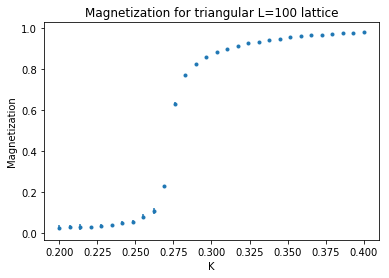

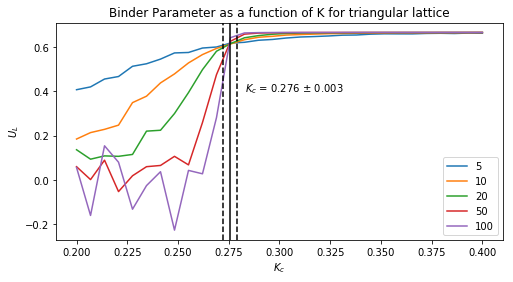

<Figure size 576x288 with 0 Axes>

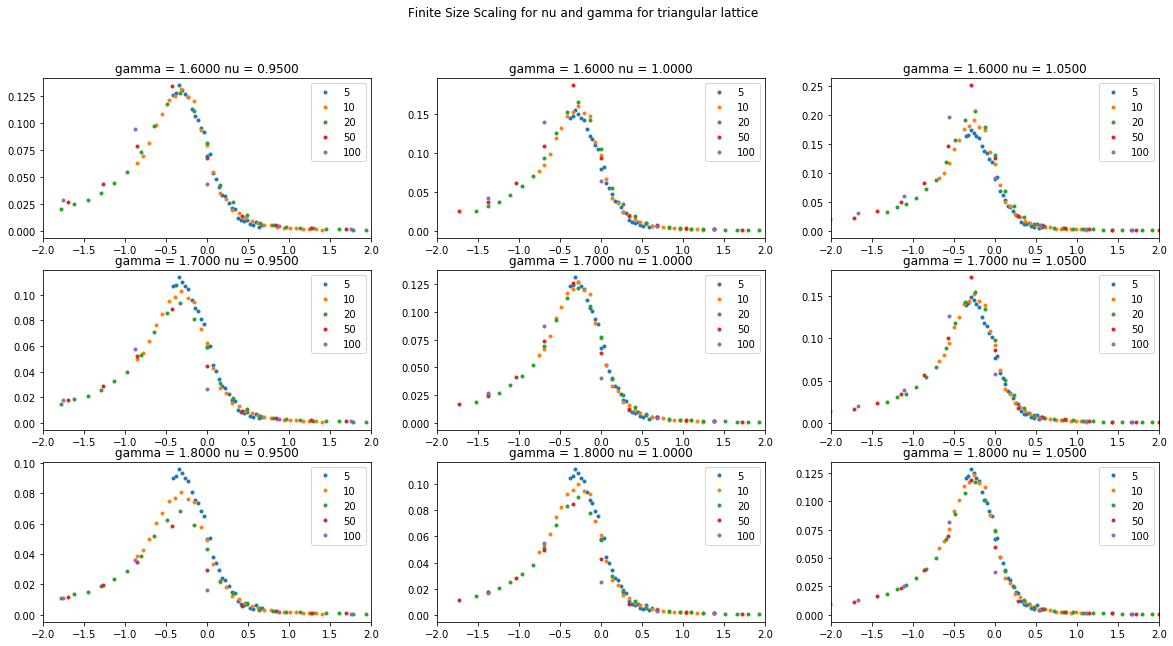

<Figure size 576x288 with 0 Axes>

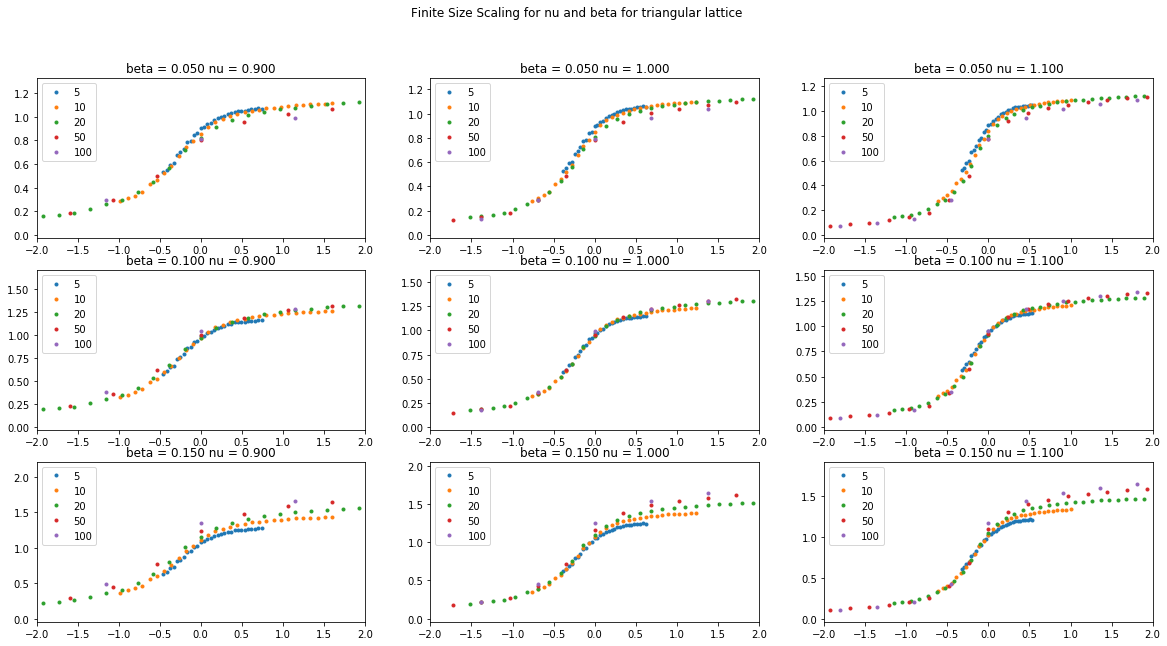

<Figure size 576x288 with 0 Axes>

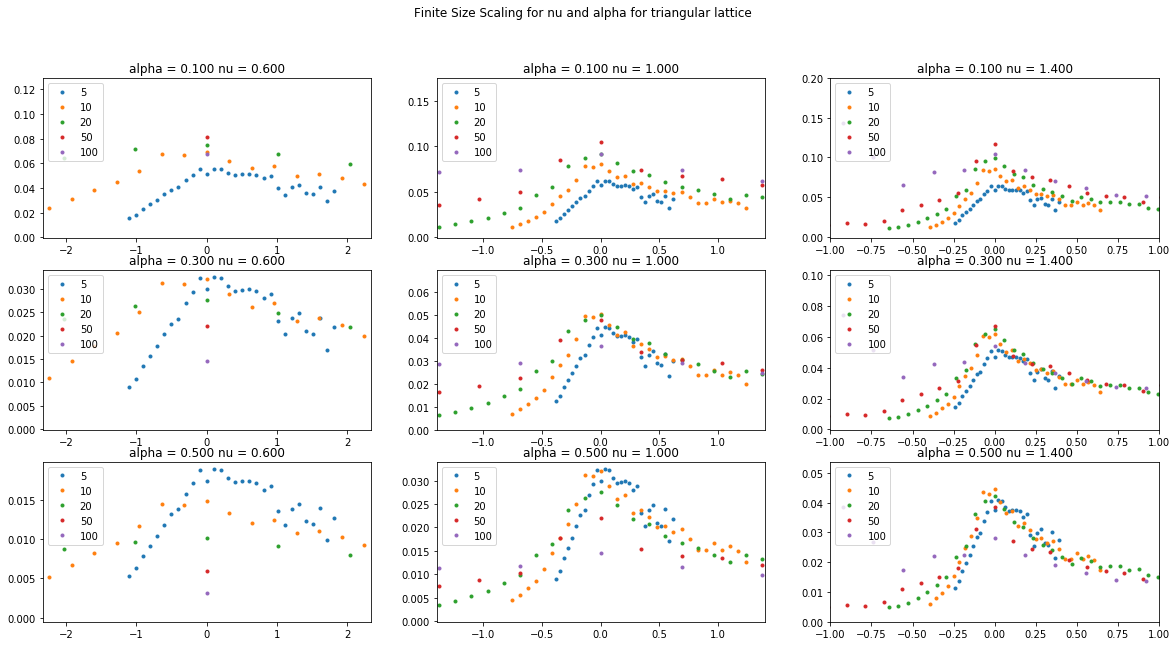

In [48]:
# Square magnetization calculations
lattice = 'triangular'
N_k = 30
Ks = np.linspace(0.2,0.4,N_k)
Ls = [5,10,20,50,100]
L = 100
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
K_delete = []
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        try:
            m = np.loadtxt(prefix+'old/m_full_%d_%f_%s'%(L,Ks[K_i],lattice))
        except:
            K_delete.append(K_i)
            continue
        e = np.loadtxt(prefix+'old/e_full_%d_%f_%s'%(L,Ks[K_i],lattice))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
Ks = np.delete(Ks,K_delete)
em = np.delete(em,K_delete,axis=1)
e2 = np.delete(e2,K_delete,axis=1)
mm = np.delete(mm,K_delete,axis=1)
m2 = np.delete(m2,K_delete,axis=1)
m4 = np.delete(m4,K_delete,axis=1)
mstd = np.delete(mstd,K_delete,axis=1)
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.27586207)
Kstd = (0.27586207-0.26896552)/2
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.3f $\pm$ %.3f'%(Kc,Kstd),(0.283,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder Parameter as a function of K for %s lattice'%(lattice))
plt.show()

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 1.7
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.1,gam_t,gam_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.4f nu = %.4f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .10
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
# c = c[1:-1]
# Ls = Ls[1:-1]
nu_t = 1
alpha_t = 0.3
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.4,nu_t,nu_t+0.4]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-1.4/nu,1.4/nu])
#             ax.set_ylim([0,0.08/(alpha+0.15)])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()


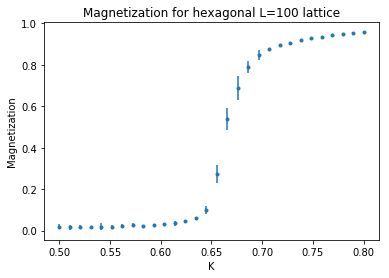

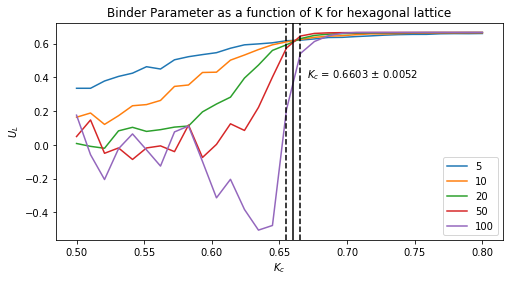

<Figure size 576x288 with 0 Axes>

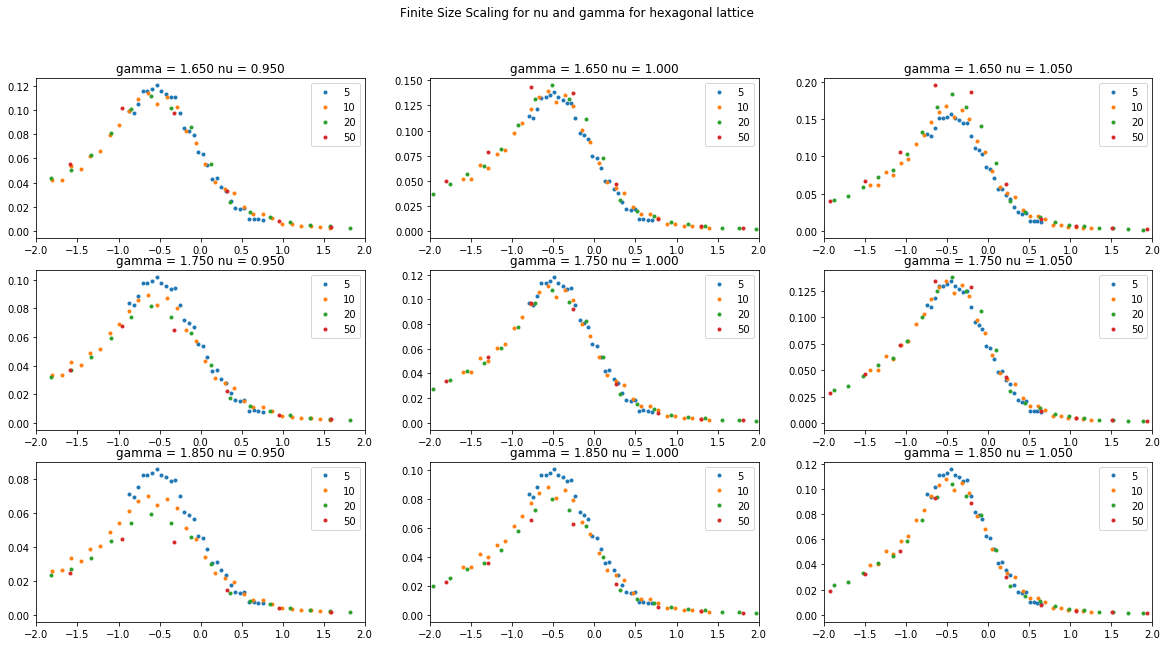

<Figure size 576x288 with 0 Axes>

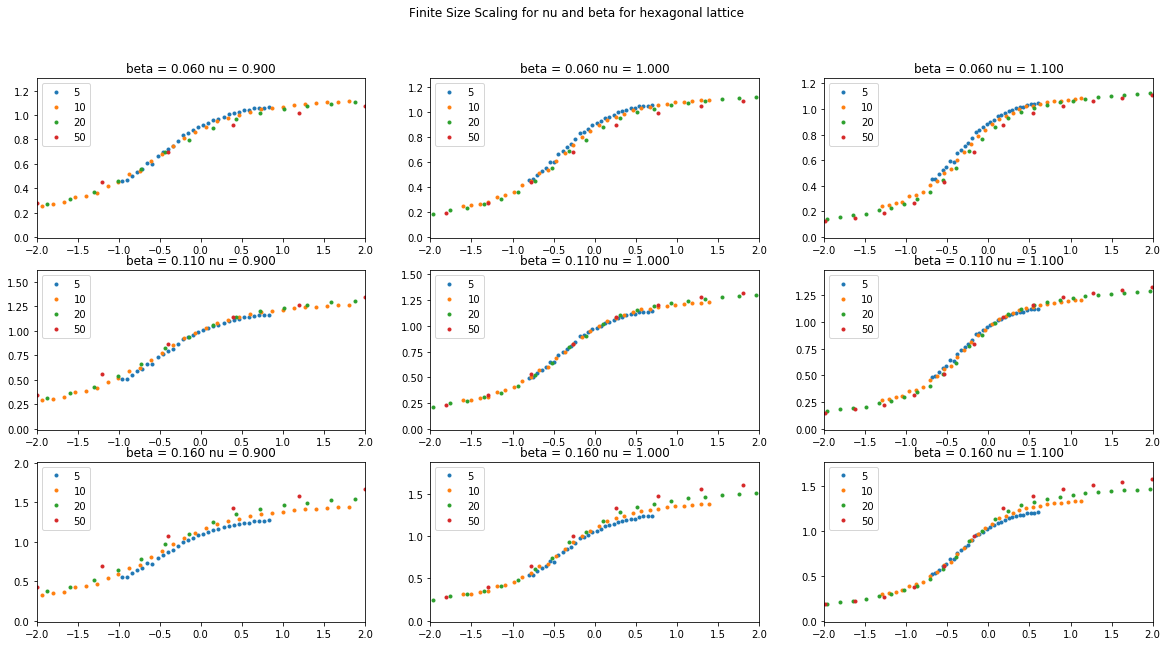

<Figure size 576x288 with 0 Axes>

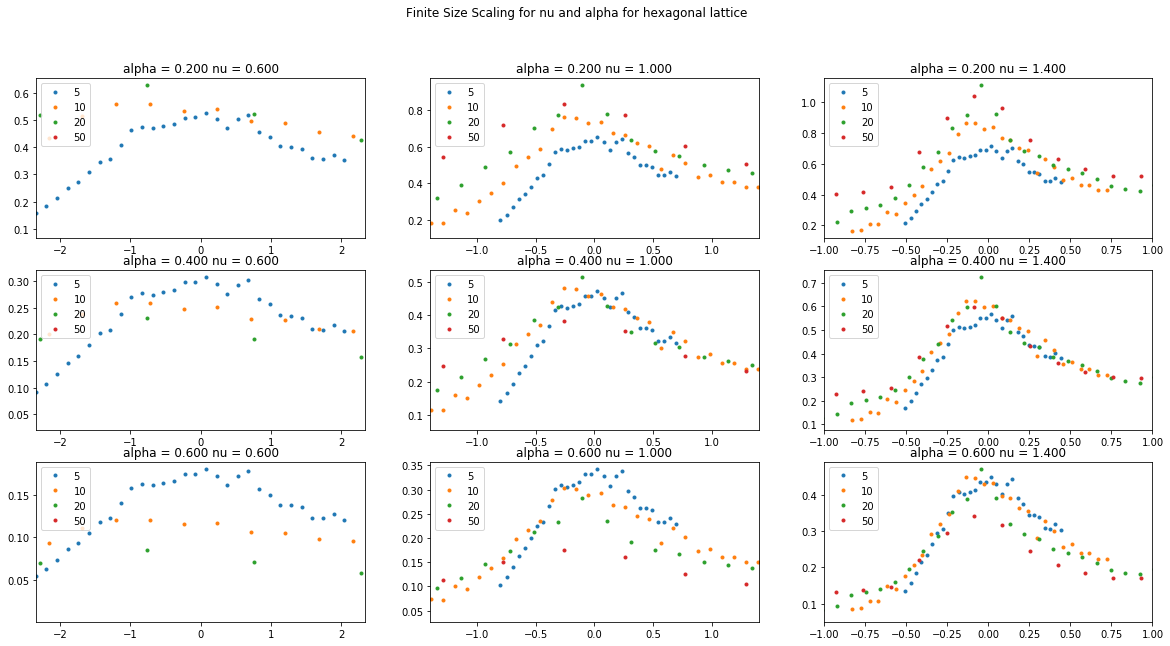

In [49]:
# Square magnetization calculations
lattice = 'hexagonal'
N_k = 30
Ks = np.linspace(0.5,0.8,N_k)
Ls = [5,10,20,50,100]
L = 100
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
K_delete = []
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        try:
            m = np.loadtxt(prefix+'old/m_full_%d_%f_%s'%(L,Ks[K_i],lattice))
        except:
            K_delete.append(K_i)
            continue
        e = np.loadtxt(prefix+'old/e_full_%d_%f_%s'%(L,Ks[K_i],lattice))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
Ks = np.delete(Ks,K_delete)
em = np.delete(em,K_delete,axis=1)
e2 = np.delete(e2,K_delete,axis=1)
mm = np.delete(mm,K_delete,axis=1)
m2 = np.delete(m2,K_delete,axis=1)
m4 = np.delete(m4,K_delete,axis=1)
mstd = np.delete(mstd,K_delete,axis=1)
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.65517241+0.66551724)/2
Kstd = (0.66551724-0.65517241)/2
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.67,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder Parameter as a function of K for %s lattice'%(lattice))
plt.show()

Ls = [5,10,20,50]

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 1.75
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.1,gam_t,gam_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .11
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
# c = c[1:-1]
# Ls = Ls[1:-1]
nu_t = 1.0
alpha_t = 0.4
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.4,nu_t,nu_t+0.4]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-1.4/nu,1.4/nu])
#             ax.set_ylim([0,0.08/(alpha+0.15)])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()


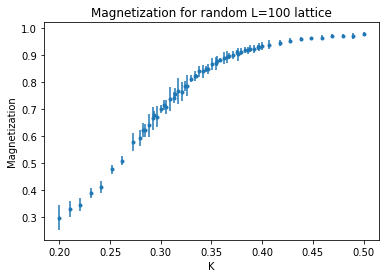

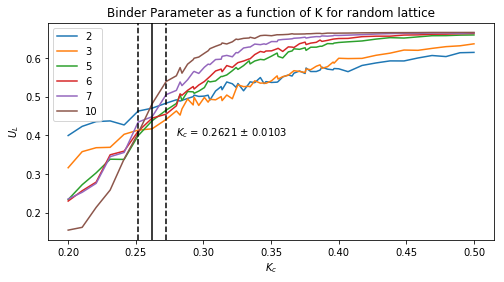

<Figure size 576x288 with 0 Axes>

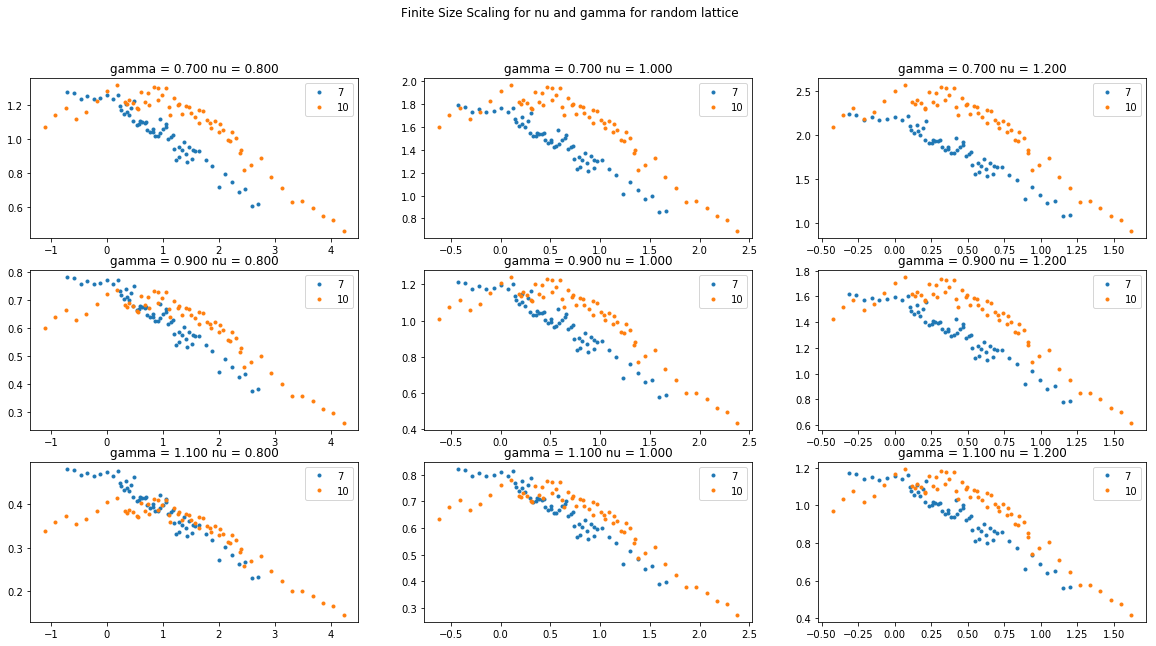

<Figure size 576x288 with 0 Axes>

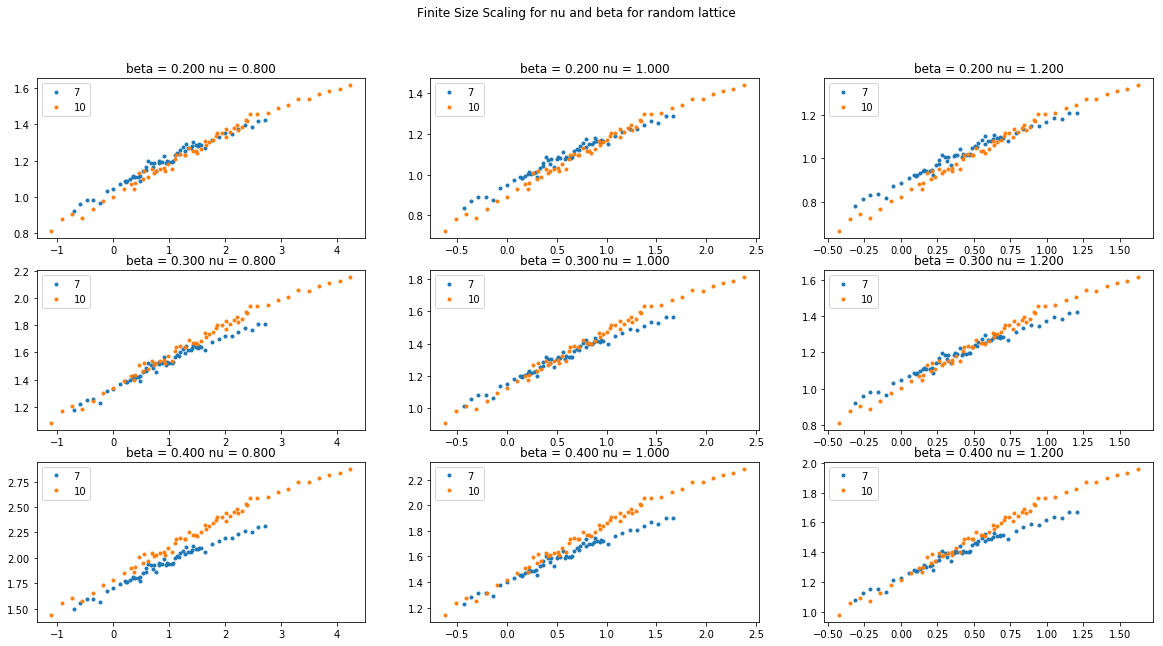

<Figure size 576x288 with 0 Axes>

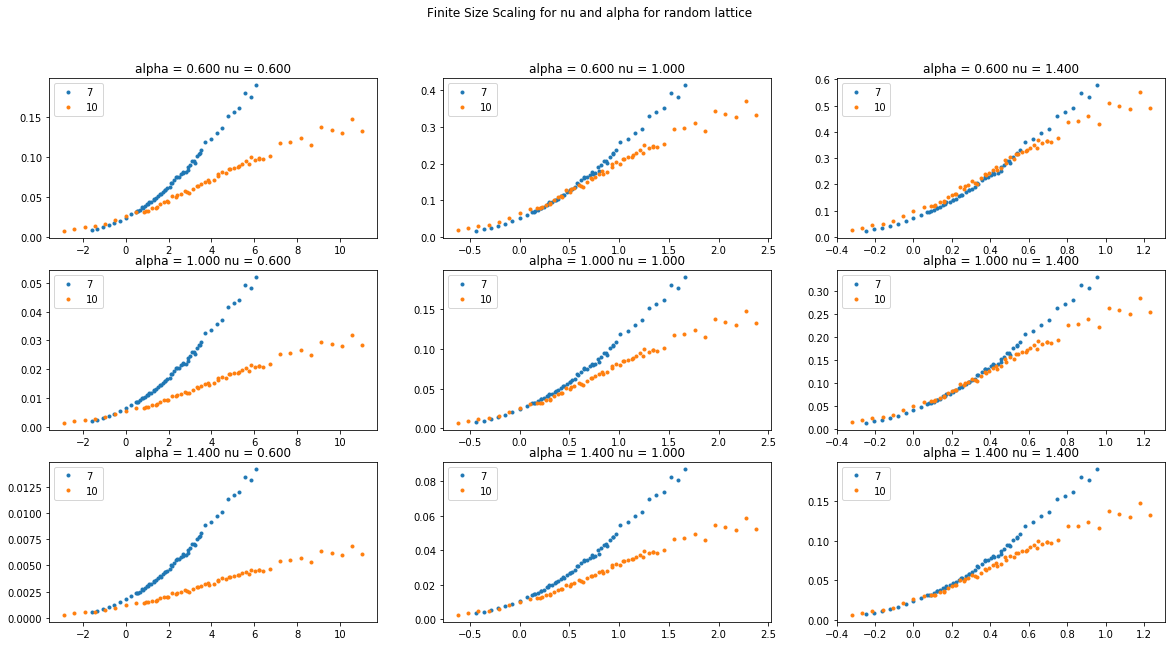

In [50]:
# Square magnetization calculations
lattice = 'random'
N_k = 30
Ks = np.concatenate((np.linspace(0.2,0.5,N_k),np.linspace(0.28,0.4,N_k)))
Ks.sort()
Ls = [2,3,5,6,7,10]
L = 100
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
K_delete = []
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        try:
            m = np.loadtxt(prefix+'m_full_%d_%f_%s_False'%(L,Ks[K_i],lattice))
        except:
            K_delete.append(K_i)
            continue
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_False'%(L,Ks[K_i],lattice))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
Ks = np.delete(Ks,K_delete)
em = np.delete(em,K_delete,axis=1)
e2 = np.delete(e2,K_delete,axis=1)
mm = np.delete(mm,K_delete,axis=1)
m2 = np.delete(m2,K_delete,axis=1)
m4 = np.delete(m4,K_delete,axis=1)
mstd = np.delete(mstd,K_delete,axis=1)
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = 0.26206897
Kstd = (0.26206897-0.25172414)
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.28,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder Parameter as a function of K for %s lattice'%(lattice))
plt.show()

Ls = [7,10]

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 0.9
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.2,nu_t,nu_t+0.2]
gammas = [gam_t-.2,gam_t,gam_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
#             ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .30
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.2,nu_t,nu_t+0.2]
betas = [beta_t-.1,beta_t,beta_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
#             ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
# c = c[1:-1]
# Ls = Ls[1:-1]
nu_t = 1
alpha_t = 1.0
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.4,nu_t,nu_t+0.4]
alphas = [alpha_t-.4,alpha_t,alpha_t+.4]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')

#             ax.set_ylim([0,0.08/(alpha+0.15)])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()


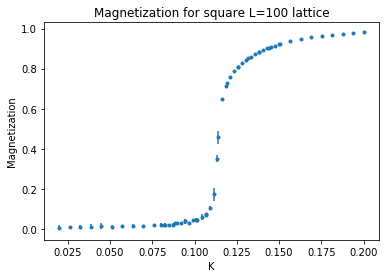

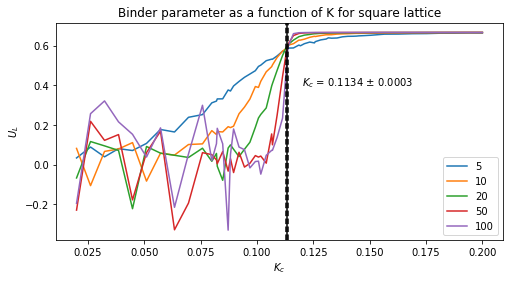

<Figure size 576x288 with 0 Axes>

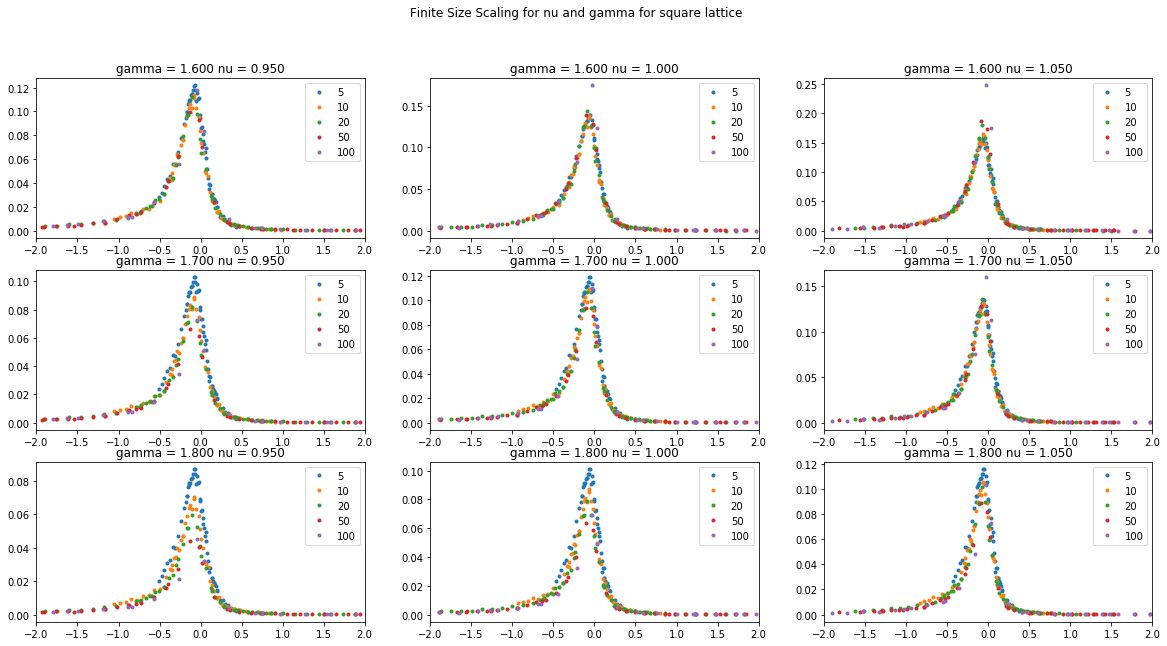

<Figure size 576x288 with 0 Axes>

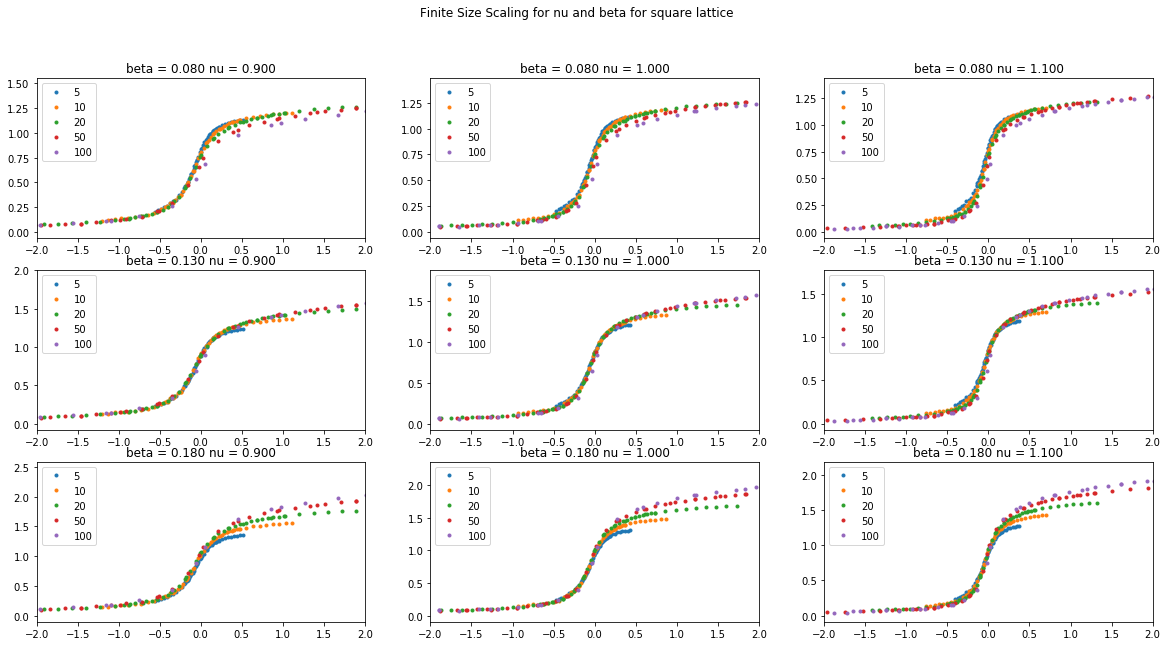

<Figure size 576x288 with 0 Axes>

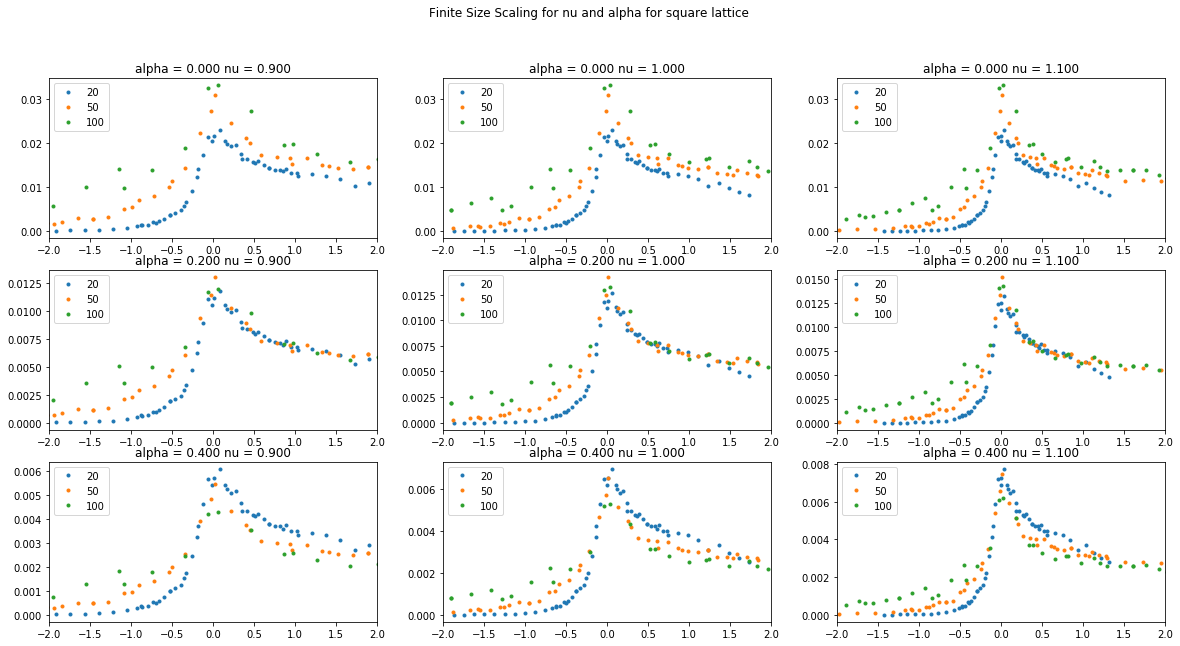

In [51]:
# Square magnetization calculations
lattice = 'square'
N_k = 30
Ks = np.concatenate((np.linspace(0.02,0.2,N_k),np.linspace(0.08,0.15,N_k)))
Ks.sort()
Ls = [5,10,20,50,100]
L = 100
nn = True 
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        m = np.loadtxt(prefix+'m_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.11310345+0.1137931)/2
Kstd = (0.1137931-0.11310345)/2
Kc_i = 20
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.12,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder parameter as a function of K for %s lattice'%(lattice))
plt.show()

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 1.7
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.1,gam_t,gam_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .13
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
c = c[2:]
Ls = Ls[2:]
nu_t = 1
alpha_t = 0.2
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-2,2])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()

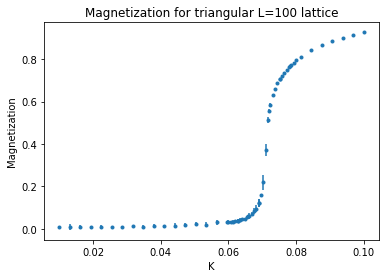

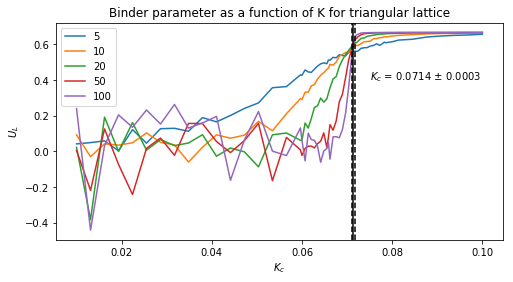

<Figure size 576x288 with 0 Axes>

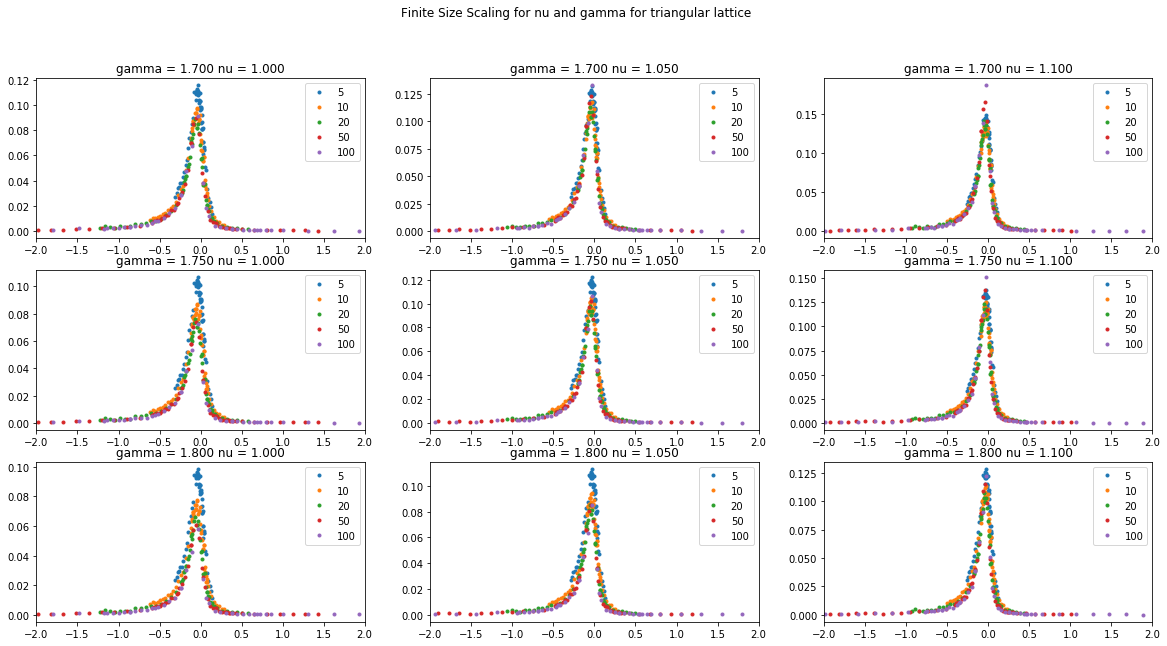

<Figure size 576x288 with 0 Axes>

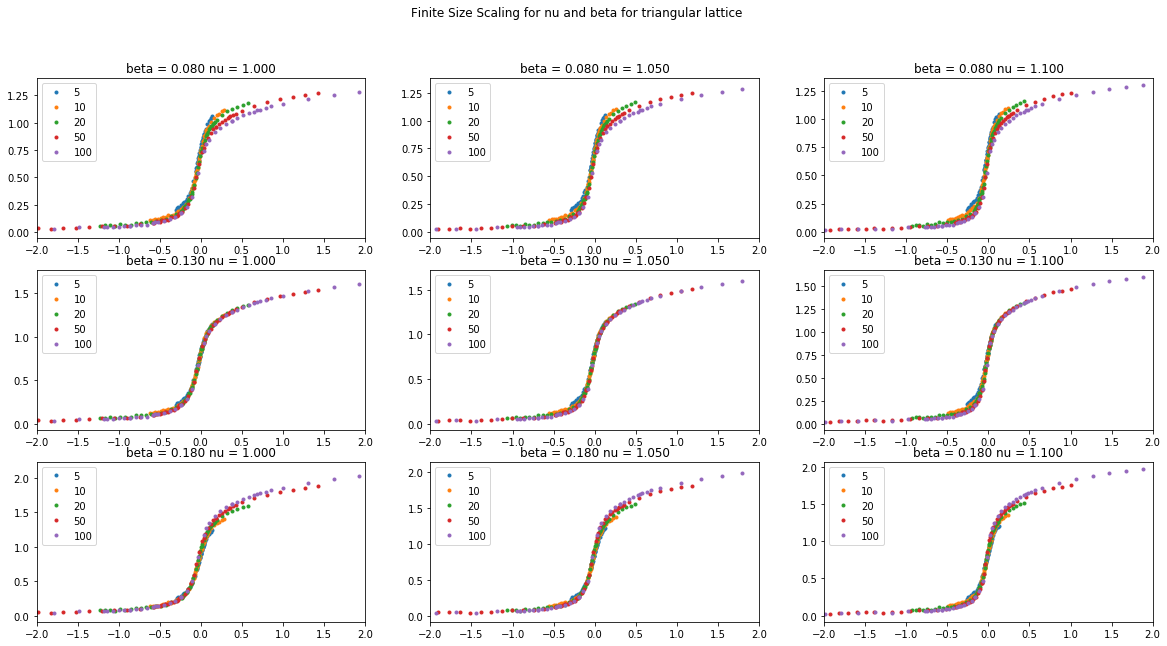

<Figure size 576x288 with 0 Axes>

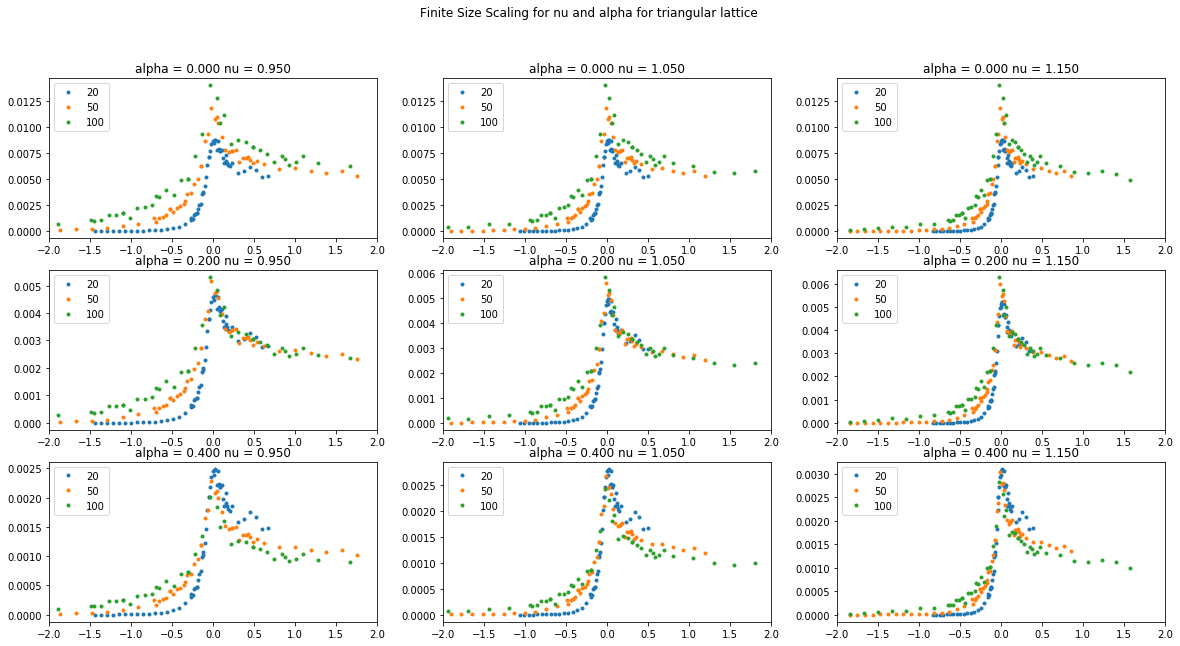

In [53]:
# Square magnetization calculations
lattice = 'triangular'
N_k = 30
Ks = np.concatenate((np.linspace(0.01,0.1,N_k),np.linspace(0.06,0.08,N_k)))
Ks.sort()
Ls = [5,10,20,50,100]
L = 100
nn = True 
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        m = np.loadtxt(prefix+'m_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.07103448+0.07172414)/2
Kstd = (0.07172414-0.07103448)/2
Kc_i = 20
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.075,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder parameter as a function of K for %s lattice'%(lattice))
plt.show()

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1.05
gam_t = 1.75
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.05,gam_t,gam_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1.05
beta_t = .13
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
c = c[2:]
Ls = Ls[2:]
nu_t = 1.05
alpha_t = 0.2
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-2,2])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()

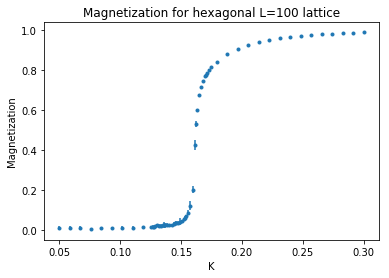

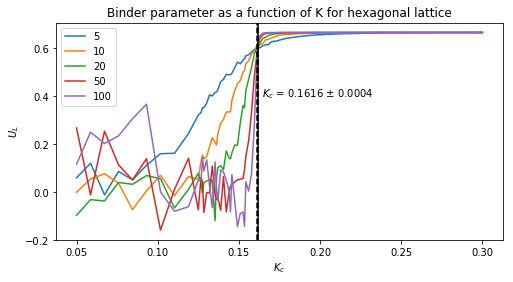

<Figure size 576x288 with 0 Axes>

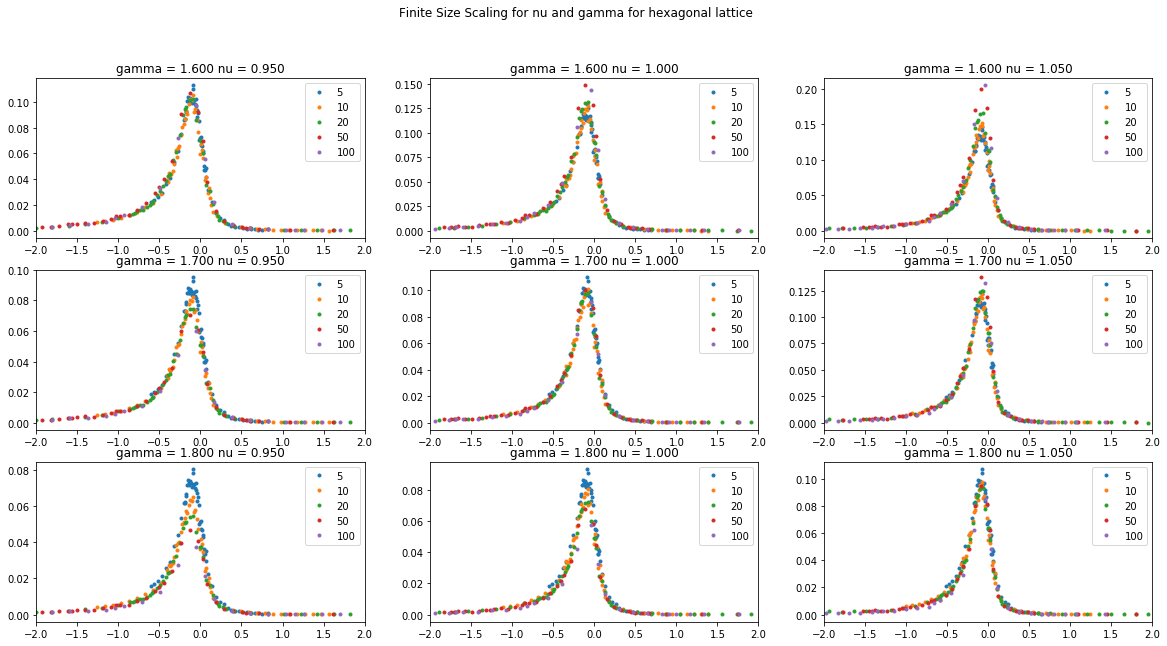

<Figure size 576x288 with 0 Axes>

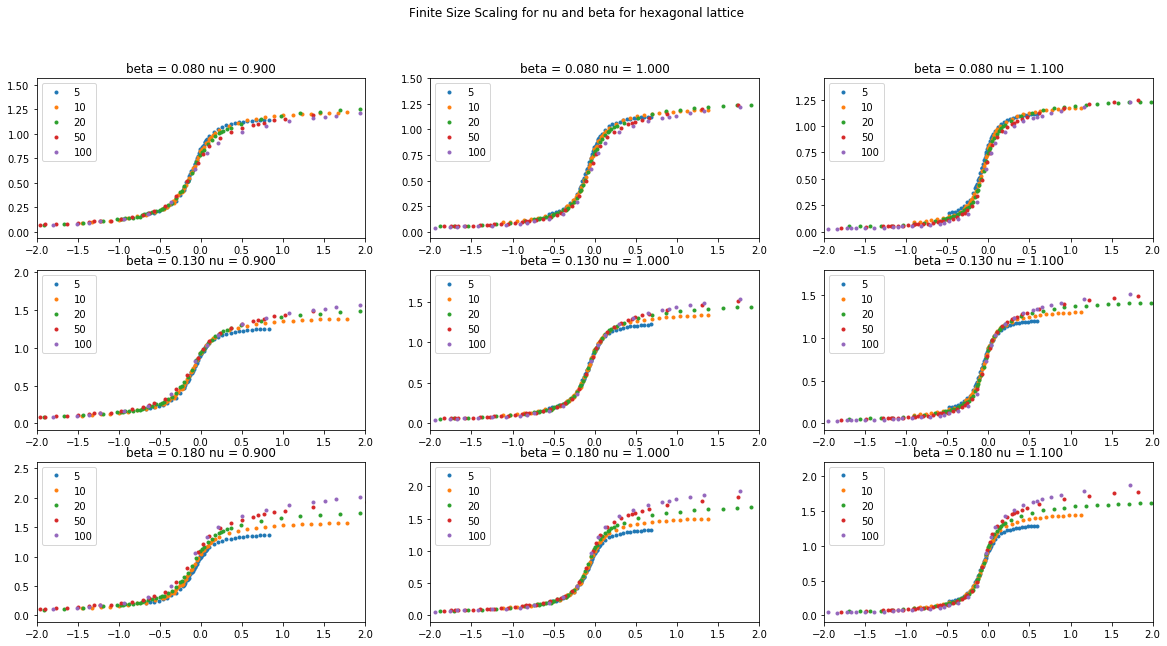

<Figure size 576x288 with 0 Axes>

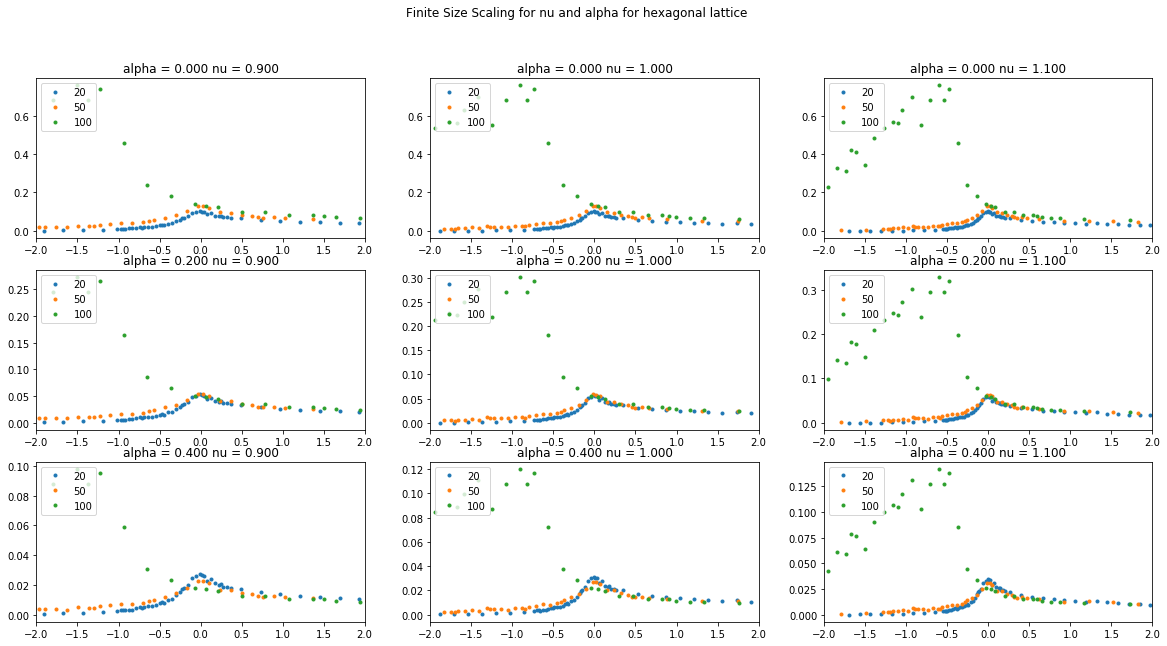

In [55]:
# Square magnetization calculations
lattice = 'hexagonal'
N_k = 30
Ks = np.concatenate((np.linspace(0.05,0.3,N_k),np.linspace(0.125,0.175,N_k)))
Ks.sort()
Ls = [5,10,20,50,100]
L = 100
nn = True 
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        m = np.loadtxt(prefix+'m_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.1612069+0.16206897)/2
Kstd = (0.16206897-0.1612069)/2
Kc_i = 20
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.164,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder parameter as a function of K for %s lattice'%(lattice))
plt.show()

# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1
gam_t = 1.7
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.05,nu_t,nu_t+0.05]
gammas = [gam_t-.1,gam_t,gam_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1
beta_t = .13
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
betas = [beta_t-.05,beta_t,beta_t+.05]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
c = c[2:]
Ls = Ls[2:]
nu_t = 1
alpha_t = 0.2
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-2,2])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()

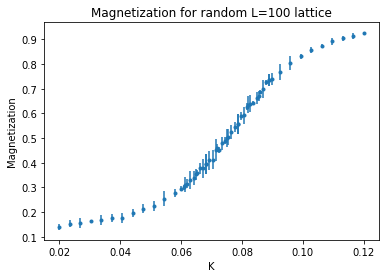

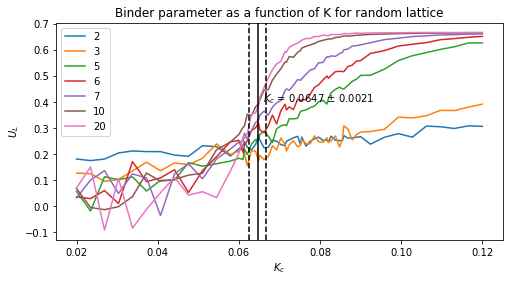

<Figure size 576x288 with 0 Axes>

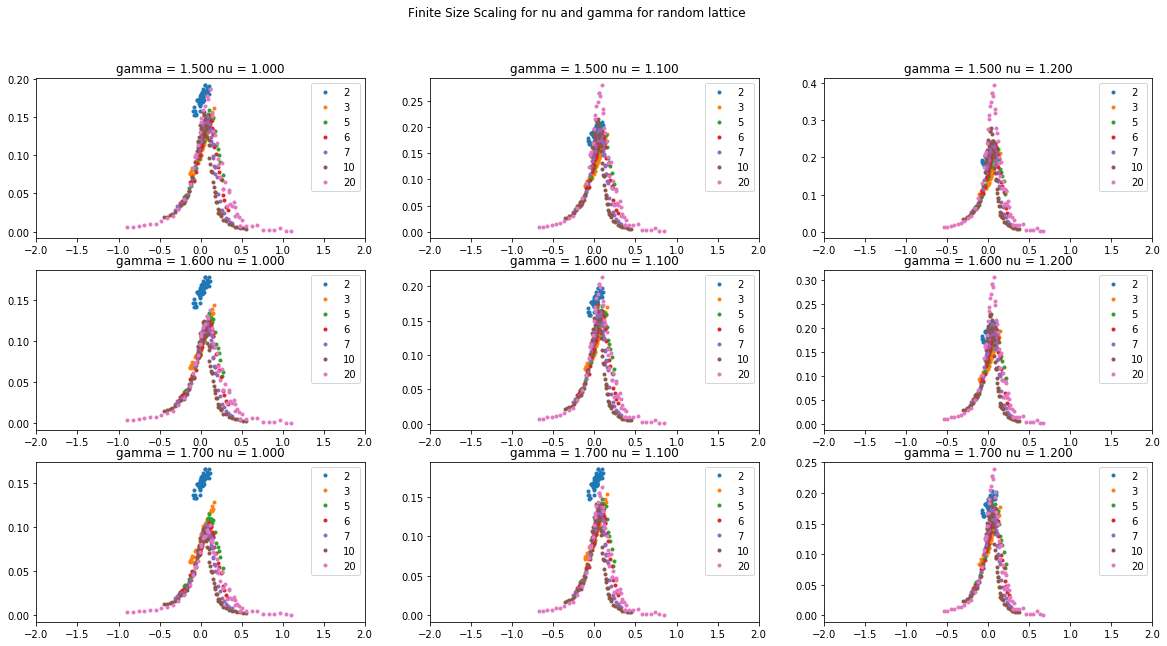

<Figure size 576x288 with 0 Axes>

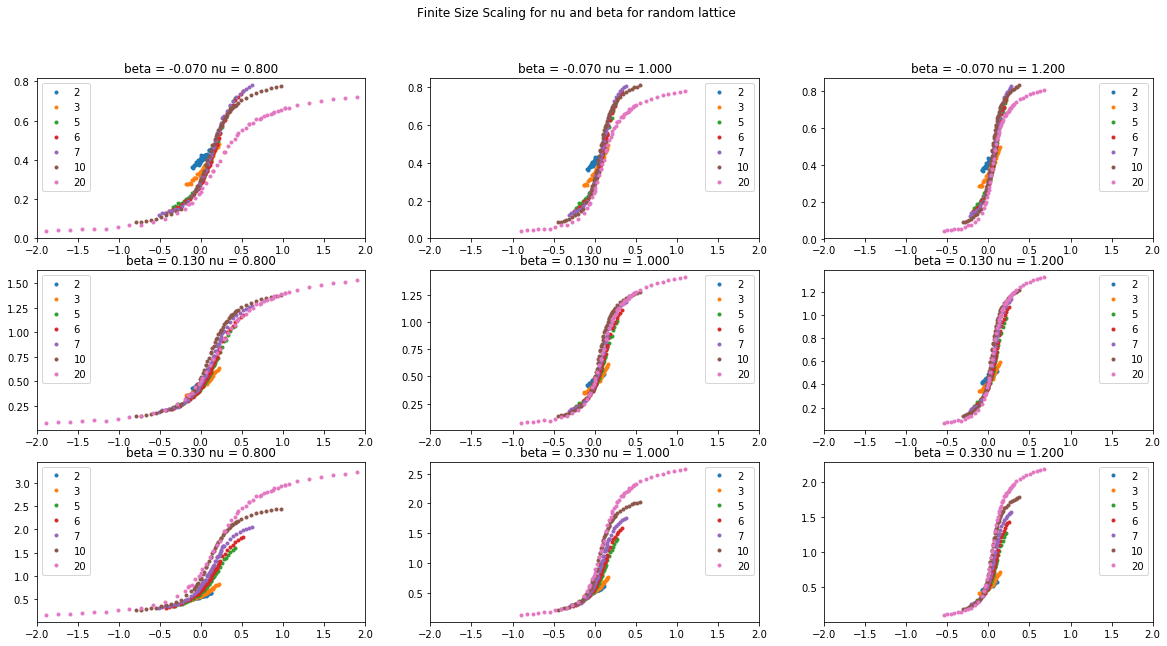

<Figure size 576x288 with 0 Axes>

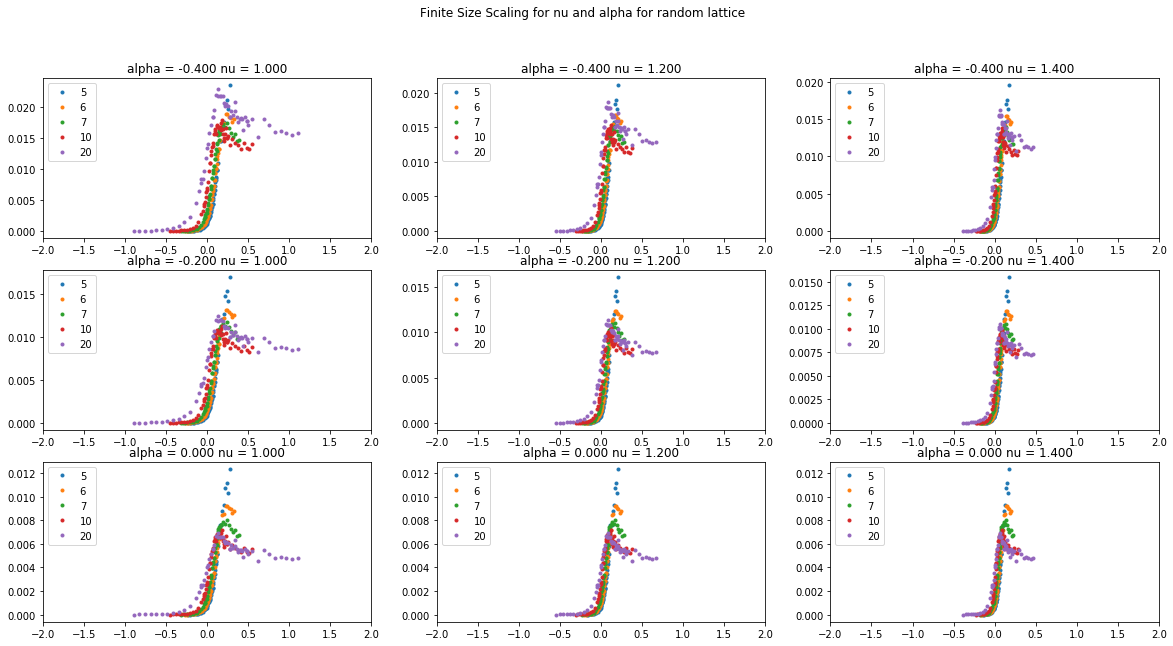

In [57]:
# Square magnetization calculations
lattice = 'random'
N_k = 30
Ks = np.concatenate((np.linspace(0.02,0.12,N_k),np.linspace(0.06,0.09,N_k)))
Ks.sort()
Ls = [2,3,5,6,7,10,20]
L = 100
nn = True 
em = np.zeros((len(Ls),len(Ks)))
e2 = np.zeros((len(Ls),len(Ks)))
mm = np.zeros((len(Ls),len(Ks)))
m2 = np.zeros((len(Ls),len(Ks)))
m4 = np.zeros((len(Ls),len(Ks)))
mstd = np.zeros((len(Ls),len(Ks)))
for L_i in range(len(Ls)):
    L = Ls[L_i]
    for K_i in range(len(Ks)):
        m = np.loadtxt(prefix+'m_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))
        e = np.loadtxt(prefix+'e_full_%d_%f_%s_%r'%(L,Ks[K_i],lattice,nn))/(L**2)
        em[L_i,K_i] = np.mean(e)
        e2[L_i,K_i] = np.mean(e*e)
        mm[L_i,K_i] = np.mean(m)
        m2[L_i,K_i] = np.mean(m*m)
        m4[L_i,K_i] = np.mean(m**4)
        mstd[L_i,K_i] = np.std(np.mean(m,axis=1))
plt.errorbar(Ks,mm[4],yerr=mstd[4]*2,fmt='.')
plt.xlabel('K')
plt.ylabel('Magnetization')
plt.title('Magnetization for %s L=100 lattice'%(lattice))
plt.show()

# Now we use the Binder parameter to get the critical temperature and nu.
U_L = 1 - m4/(3*(m2**2))
legend = []
plt.figure(figsize=(8, 4))
for L_i in range(len(Ls)):
    legend.append(Ls[L_i])
    plt.plot(Ks,U_L[L_i])
plt.legend(legend)
Kc = (0.06413793+0.06517241)/2
Kstd = (0.06517241-0.06413793)*2
Kc_i = 20
plt.axvline(x=Kc,color='k');
plt.axvline(x=Kc-Kstd,color='k',linestyle='--');plt.axvline(x=Kc+Kstd,color='k',linestyle='--')
plt.annotate('$K_c$ = %.4f $\pm$ %.4f'%(Kc,Kstd),(0.066,0.4))
plt.ylabel('$U_L$')
plt.xlabel('$K_c$')
plt.title('Binder parameter as a function of K for %s lattice'%(lattice))
plt.show()

Ls = [2,3,5,6,7,10,20]
# Finite size scaling for gamma and nu
xi = (m2 - mm**2)
nu_t = 1.1
gam_t = 1.6
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.1,nu_t,nu_t+0.1]
gammas = [gam_t-.1,gam_t,gam_t+.1]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for g_i in range(len(gammas)):
        nu = nus[n_i]
        gam = gammas[g_i]
        ax = fig.add_subplot(3,3,g_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-gam/nu)*xi[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('gamma = %.3f nu = %.3f'%(gam,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and gamma for %s lattice'%(lattice))
plt.show()

# Finite size scaling for beta and nu
nu_t = 1.0
beta_t = .13
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.2,nu_t,nu_t+0.2]
betas = [beta_t-.2,beta_t,beta_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for b_i in range(len(betas)):
        nu = nus[n_i]
        beta = betas[b_i]
        ax = fig.add_subplot(3,3,b_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(beta/nu)*mm[L_i],'.')
            ax.set_xlim([-2,2])
            ax.set_title('beta = %.3f nu = %.3f'%(beta,nu))
            ax.legend(Ls)
fig.suptitle('Finite Size Scaling for nu and beta for %s lattice'%(lattice))
plt.show()

# Finite size scaling for c and nu. Toss out Ls that aren't working.
c = (e2 - em**2)
c = c[2:]
Ls = Ls[2:]
nu_t = 1.2
alpha_t = -0.2
legend = []
plt.figure(figsize=(8, 4))
nus = [nu_t-0.2,nu_t,nu_t+0.2]
alphas = [alpha_t-.2,alpha_t,alpha_t+.2]
fig = plt.figure(figsize=(20, 10))
for n_i in range(len(nus)):
    for a_i in range(len(alphas)):
        nu = nus[n_i]
        alpha = alphas[a_i]
        ax = fig.add_subplot(3,3,a_i*3+n_i+1)
        for L_i in range(len(Ls)):
            legend.append(Ls[L_i])
            ax.plot((Ks-Kc)*(Ls[L_i]**(1/nu)),Ls[L_i]**(2-alpha/nu)*c[L_i]*(Ks**2),'.')
            ax.set_xlim([-2,2])
            ax.set_title('alpha = %.3f nu = %.3f'%(alpha,nu))
            ax.legend(Ls,loc=2)
fig.suptitle('Finite Size Scaling for nu and alpha for %s lattice'%(lattice))
plt.show()

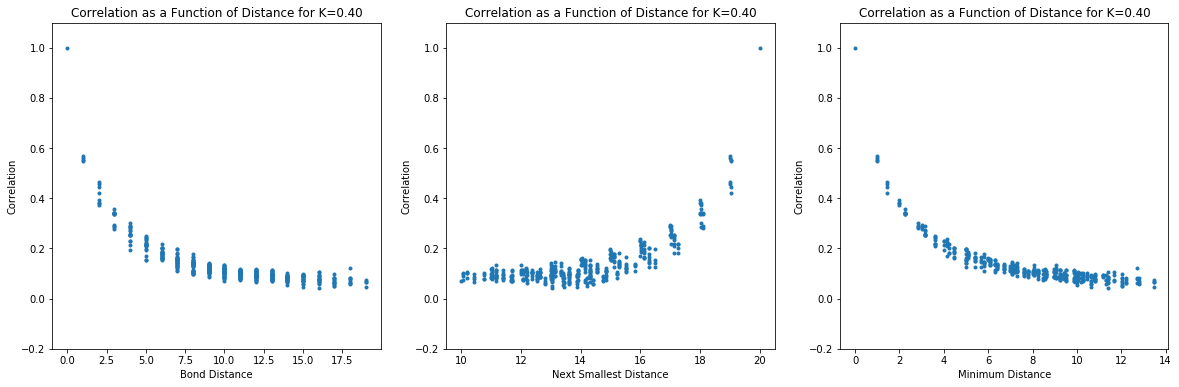

In [46]:
Ks = [0.4]
L = 20
steps = [40000]
mag_up_step = 10
fig = plt.figure(figsize=(20, 6))
for K_i in range(len(Ks)):
    K = Ks[K_i]
    step = steps[K_i]
    square = Model('square',L,K)
    _,_,c = square.wolff_algorithm(1000,step,corr_index=0)
    dists = np.zeros(len(c))
    ax = fig.add_subplot(1,3,3)
    for j in range(len(c)):
        dists[j] = square.get_distance(0,j)
    ax.plot(dists,c,'.')
    ax.set_ylim([-0.2,1.1])
    ax.set_xlabel('Minimum Distance')
    ax.set_ylabel('Correlation')
    ax.set_title('Correlation as a Function of Distance for K=%.2f'%(K))
    ax = fig.add_subplot(1,3,2)
    for j in range(len(c)):
        dists[j] = square.get_distance(0,j,True)
    ax.plot(dists,c,'.')
    ax.set_ylim([-0.2,1.1])
    ax.set_xlabel('Next Smallest Distance')
    ax.set_ylabel('Correlation')
    ax.set_title('Correlation as a Function of Distance for K=%.2f'%(K))
    ax = fig.add_subplot(1,3,1)
    dists = np.zeros(len(c))
    for j in range(len(c)):
        dists[j] = square.get_distance(0,j,False,True)
    ax.plot(dists,c,'.')
    ax.set_ylim([-0.2,1.1])
    ax.set_xlabel('Bond Distance')
    ax.set_ylabel('Correlation')
    ax.set_title('Correlation as a Function of Distance for K=%.2f'%(K))

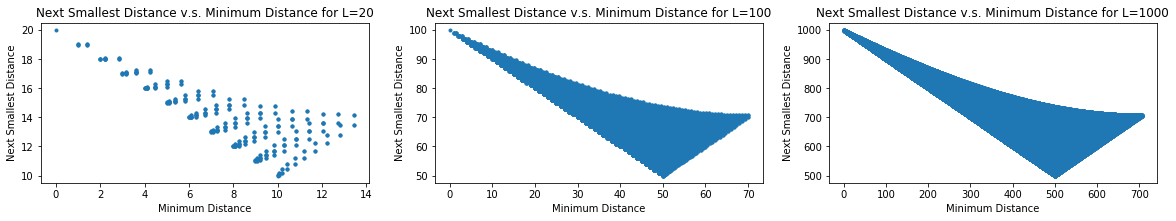

In [23]:
Ls = [20,100,1000]
K = 1
i=1
fig = plt.figure(figsize=(20, 10))
for L in Ls:
    ax = fig.add_subplot(3,3,i)
    square = Model('square',L,K)
    dists = np.zeros(square.N)
    n_dists = np.zeros(square.N)
    n_bonds = np.zeros(square.N)
    for j in range(square.N):
        dists[j] = square.get_distance(0,j)
        n_dists[j] = square.get_distance(0,j,next_min=True)
    ax.plot(dists,n_dists,'.')
    ax.set_title('Next Smallest Distance v.s. Minimum Distance for L=%d'%(L))
    ax.set_xlabel('Minimum Distance')
    ax.set_ylabel('Next Smallest Distance')
    i+=1
plt.show()

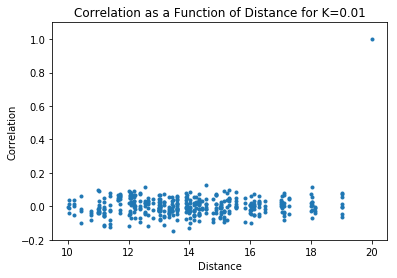

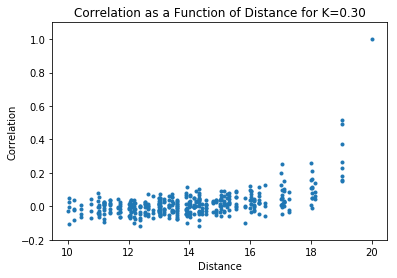

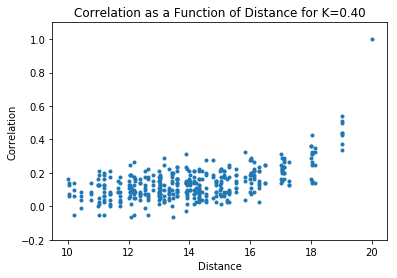

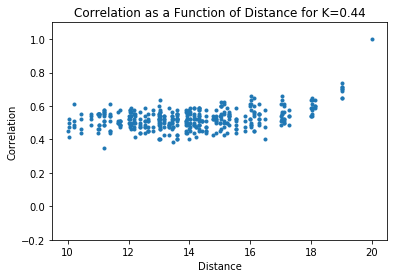

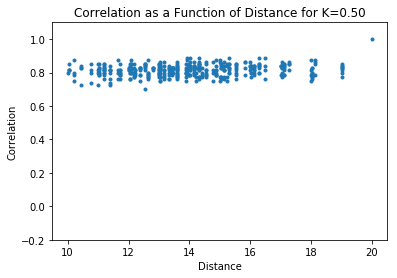

In [26]:
Ks = [0.01,0.3,0.4,0.44,0.5]
L = 20
steps = [80000,16000,1600,1600,1600]
mag_up_step = 10
for K_i in range(len(Ks)):
    K = Ks[K_i]
    step = steps[K_i]
    square = Model('square',L,K)
    _,_,c = square.wolff_algorithm(1000,step,corr_index=0)
    dists = np.zeros(len(c))
    n_dists = np.zeros(len(c))
    for j in range(len(c)):
        dists[j] = 1/(1/square.get_distance(0,j)+1/square.get_distance(0,j,True))
    plt.plot(dists,c,'.')
    plt.ylim([-0.2,1.1])
    plt.xlabel('Distance')
    plt.ylabel('Correlation')
    plt.title('Correlation as a Function of Distance for K=%.2f'%(K))
    plt.show()

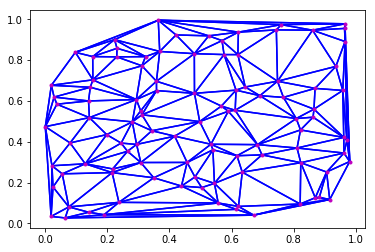

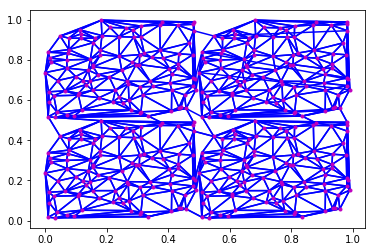

In [76]:
# Hand stitch a 20x20 random lattice
prefix = '/Users/sebwagner/Documents/Grad_School/Physics 212/Final Project/Code/rand_lat/'
rand_lattice_path = prefix + 'lattice_L_%d.pkl'%(10)
with open(rand_lattice_path,'rb') as pk_file:
    neigh_dict,x_coords,y_coords = pickle.load(pk_file)
plot_random_lattice(neigh_dict,x_coords,y_coords)
x_coords = np.array([x_coords,x_coords+1,x_coords,x_coords+1]).flatten()/2
y_coords = np.array([y_coords,y_coords,y_coords+1,y_coords+1]).flatten()/2
new_dict = copy.deepcopy(neigh_dict)
N=100
for step in range(1,4):
    for n in neigh_dict:
        new_dict[n+step*N] = set()
        for j in neigh_dict[n]:
            new_dict[n+step*N].add(j+step*N)
test_dict = copy.deepcopy(new_dict)
bottom = np.array([33,  4, 14, 0])
bottom = bottom[x_coords[bottom].argsort()]
top = np.array([73, 38, 47,53])
top = top[x_coords[top].argsort()]
right = np.array([67, 10, 54, 0])
right = right[y_coords[right].argsort()]
left = np.array([56,  4, 26,53])
left = left[y_coords[left].argsort()]
# Connect top to bottom and left to right
for t in range(len(top)):
    test_dict[top[t]].add(bottom[t]+2*N)
    test_dict[bottom[t]+2*N].add(top[t])
    test_dict[top[t]+N].add(bottom[t]+3*N)
    test_dict[bottom[t]+3*N].add(top[t]+N)
    test_dict[right[t]].add(left[t]+N)
    test_dict[left[t]+N].add(right[t])
    test_dict[right[t]+2*N].add(left[t]+3*N)
    test_dict[left[t]+3*N].add(right[t]+3*N)
plot_random_lattice(test_dict,x_coords,y_coords)
rand_lattice_path = prefix + 'lattice_L_%d.pkl'%(20)
with open(rand_lattice_path,'wb') as pk_file:
    pickle.dump([test_dict,x_coords,y_coords],pk_file)